In [1]:
from matplotlib import pyplot as plt
import numpy as np

from synet.networks import random_network
from synet.utils import apply_process, apply_measures
from synet.visualization import plot_process_results, plot_measure_results, plot_correlation_network
from synet.visualization import plot_process_v_measure, plot_pvm_dt, plot_bootstrap_sim

In [2]:
from synet.process import PredatorProcess
process = PredatorProcess()

In [3]:
n_networks = 1000
process_dt = 250
n_events = 5000
np.random.seed(1287364)

In [4]:
%%time
networks = [random_network(n_events=n_events) for _ in range(n_networks)]

CPU times: user 2min 16s, sys: 68.5 ms, total: 2min 16s
Wall time: 2min 16s


In [5]:
%%time
process_results = apply_process(networks, process=process, dt=process_dt, n_sim=2560, n_jobs=32)

CPU times: user 1min 5s, sys: 19min 12s, total: 20min 18s
Wall time: 17min 49s


In [6]:
%%time
measure_results = apply_measures(networks, max_dt=100, n_jobs=32)

CPU times: user 1.56 s, sys: 16.5 s, total: 18 s
Wall time: 2min 4s


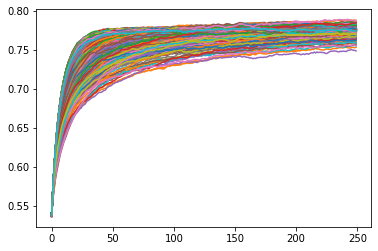

In [12]:
plot_process_results(process_results)

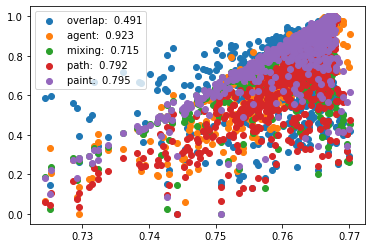

In [13]:
plot_process_v_measure(process_results, measure_results)

/home/qubix/.local/lib/python3.9/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


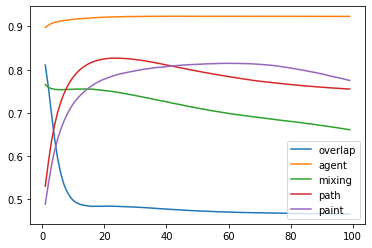

In [14]:
plot_pvm_dt(process_results, measure_results)

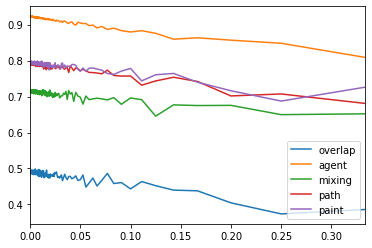

In [15]:
plot_correlation_network(process_results, measure_results, n_resample=500)

In [11]:
#plot_bootstrap_sim(process_results, measure_results, n_bootstrap=50)